In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [66]:
from fastai.datasets import untar_data,URLs
from fastai.vision import *
from torchvision.datasets import ImageNet
from torchvision.utils import *

In [8]:
path = untar_data(URLs.PETS); path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [9]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [13]:
path_img=path/'images'
path_anno=path/'annotations'

In [17]:
filenames=get_image_files(path_img)
filenames[1]

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_11.jpg')

In [18]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [76]:
tfms=get_transforms()
data=ImageDataBunch.from_name_re(path=path_img,
                                 fnames=filenames,
                                 pat=pat,
                                valid_pct=0.2,
                                size=224,
                                bs=64,ds_tfms=tfms).normalize(imagenet_stats)

In [100]:
#train_ds=LabelList(data.x[0:3000],data.y[0:3000]);train_ds

LabelList (3000 items)
x: ImageList
Image (3, 500, 333),Image (3, 375, 500),Image (3, 500, 361),Image (3, 333, 500),Image (3, 333, 500)
y: CategoryList
saint_bernard,english_cocker_spaniel,British_Shorthair,newfoundland,newfoundland
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images

In [101]:
#valid_ds=LabelList(data.x[3001:],data.y[3001:]);valid_ds

LabelList (2911 items)
x: ImageList
Image (3, 300, 163),Image (3, 424, 500),Image (3, 375, 500),Image (3, 271, 310),Image (3, 374, 500)
y: CategoryList
yorkshire_terrier,german_shorthaired,shiba_inu,Bombay,staffordshire_bull_terrier
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images

In [91]:
#dl=DataLoader(ll, batch_size=64, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)
#dl

In [102]:
data.c

37

In [104]:
learner=cnn_learner(data,models.resnet34,metrics=error_rate)

In [105]:
learner.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         1.353005    0.323571    0.105548    00:22     
1         0.605374    0.273470    0.094046    00:21     
2         0.394062    0.233215    0.083221    00:21     
3         0.293673    0.210884    0.074425    00:21     


In [107]:
learner.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.935389    #na#        00:17       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/opt/conda/lib/python3.7/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


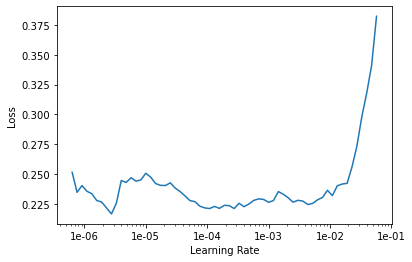

In [108]:
learner.recorder.plot()

In [109]:
learner.unfreeze()

In [110]:
learner.fit_one_cycle(4,max_lr=slice(1e-05,1e-04))

epoch     train_loss  valid_loss  error_rate  time    
0         0.246700    0.213649    0.073748    00:22     
1         0.227504    0.208437    0.073072    00:22     
2         0.174889    0.194712    0.067659    00:22     
3         0.140250    0.189664    0.065629    00:22     


In [113]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()